In [0]:
!pip install music21;

In [0]:
#tiek ieimportētas nepieciešamās bibliotēkas
from music21 import instrument, note, stream
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#fja, kas nosaka nots augstumu (do mažorā), ja tam padod krāsas vērtību
def note_pitch (pixel):
  dens = pixel/255
  #100/7=14.285...~14.3% notij
  if dens < 0.143 : return 0 #C
  elif 0.143 <= dens < 0.286 : return 2 #D
  elif 0.286 <= dens < 0.429 : return 4 #E
  elif 0.429 <= dens < 0.572 : return 5 #F
  elif 0.572 <= dens < 0.715 : return 7 #G
  elif 0.715 <= dens < 0.858 : return 9 #A
  else: return 11 #B

In [0]:
#funkcija nošu un MIDI faila veidošana
def create_music (arr, fn, download=True, printMIDI=False):
  output_notes = []
  offset = 0
  
  #tiek veidoti nošu objekti katrai masīva vērtībai, nots augstumu nosakot ar fjas note_pitch palīdzību
  #parametrs quarterLenght apzīmē nots garumu ceturtdaļās
  #offset ir nots atskaņošanas laiks attiecībā pret sākumu
  for px in arr:
    note_p = note_pitch(px)
    new_note = note.Note(note_p, quarterLength=0.5)
    new_note.offset = offset
    new_note.octave = 4
    new_note.storedInstrument = instrument.Piano()
    output_notes.append(new_note)
    
    #palielina offset katrā iterācijā, lai notis nepārklājas
    offset += 0.5
      
  #ģenerēto nošu informācija tiek ierakstīta failā
  midi_stream = stream.Stream(output_notes)
  midi_stream.write('midi', fp='{name}_412.mid'.format(name=fn.split('.')[0]))

  #ģenerēto nošu izprintēšana
  if printMIDI == 1:
    for element in midi_stream:
      print(element.nameWithOctave, element.offset)

  #ģenerētā MIDI faila lejuplāde
  if download == 1:
    files.download('{name}_412.mid'.format(name=fn.split('.')[0]))
  return

In [0]:
#attēla augšupielāde
uploaded = files.upload()

Saving rose7-10.jpg to rose7-10.jpg


In [0]:
#tiek nolasīts faila nosaukums un pats attēls
filename = list(uploaded.keys())[0]
uploaded_picture=plt.imread(filename)

#attēlam no 3 krāsu dimensijām vispirms tiek izvilkta viena, tad tā tiek saspiesta 1D masīvā
uploaded_picture_bw=np.array(uploaded_picture[:, :, 0]).reshape(uploaded_picture.shape[0]*uploaded_picture.shape[1])

#iegūtais masīvs tiek padots mūzikas ģenerēšanas fjai
create_music(uploaded_picture_bw, filename, 1, 1)

D4 0.0
D4 0.5
C4 1.0
C4 1.5
E4 2.0
E4 2.5
C4 3.0
C4 3.5
C4 4.0
C4 4.5
C4 5.0
C4 5.5
E4 6.0
G4 6.5
A4 7.0
A4 7.5
F4 8.0
D4 8.5
C4 9.0
C4 9.5
C4 10.0
D4 10.5
A4 11.0
G4 11.5
E4 12.0
F4 12.5
A4 13.0
F4 13.5
C4 14.0
C4 14.5
C4 15.0
D4 15.5
G4 16.0
F4 16.5
D4 17.0
D4 17.5
G4 18.0
F4 18.5
C4 19.0
C4 19.5
C4 20.0
C4 20.5
F4 21.0
A4 21.5
F4 22.0
E4 22.5
G4 23.0
E4 23.5
C4 24.0
C4 24.5
C4 25.0
C4 25.5
E4 26.0
A4 26.5
G4 27.0
G4 27.5
F4 28.0
D4 28.5
D4 29.0
C4 29.5
C4 30.0
C4 30.5
D4 31.0
E4 31.5
D4 32.0
D4 32.5
D4 33.0
C4 33.5
D4 34.0
D4 34.5


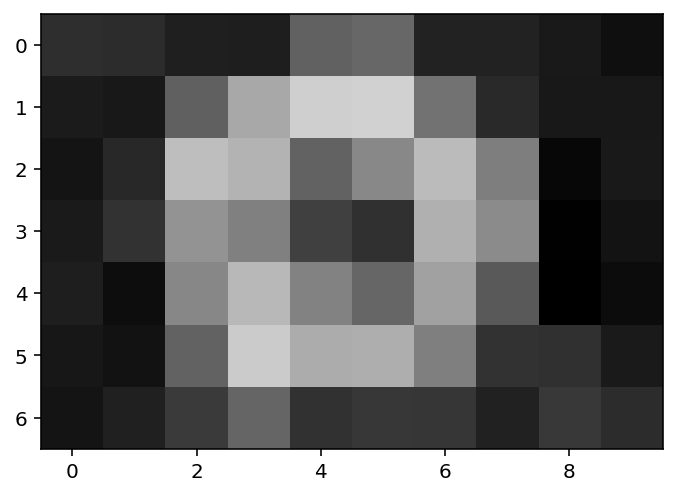

In [0]:
#iespēja attēlot attēlu, ja vajag
plt.imshow(uploaded_picture);